### Predicting Good or Bad From Credit Card Approvals
Application data contains information from clients when applying for credit card. The credit card data contains information on the length of time the credit card account was opened since the initial approval as well as the status of the loan during each month. The purpose of this machine learning task is to predict whether or not a client is good or bad based on the application/ credit card data. The target variable is not given so we will need to find a method to determine good or bad.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [23]:
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'application_record.csv'

**Brief Exploration of Applications / Credit**

In [5]:
app.head()

NameError: name 'app' is not defined

In [6]:
app.DAYS_EMPLOYED.min(),app.DAYS_EMPLOYED.max()

NameError: name 'app' is not defined

In [7]:
app.columns

NameError: name 'app' is not defined

In [8]:
app.describe()

NameError: name 'app' is not defined

In [9]:
app.info()

NameError: name 'app' is not defined

In [10]:
app.isnull().mean()

NameError: name 'app' is not defined

# Data Visulization

In [11]:
print("Number of people working status :")
print(app['OCCUPATION_TYPE'].value_counts())
sns.set(rc = {'figure.figsize':(18,6)})
sns.countplot(x='OCCUPATION_TYPE', data=app, palette = 'Set2')

Number of people working status :


NameError: name 'app' is not defined

In [12]:
print("Types of house of the peoples :")
print(app['NAME_HOUSING_TYPE'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette = 'Set2')

Types of house of the peoples :


NameError: name 'app' is not defined

In [13]:
print("How many peoples own car :")
print(app['FLAG_OWN_CAR'].value_counts())
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x='FLAG_OWN_CAR', data=app, palette = 'Set2')

How many peoples own car :


NameError: name 'app' is not defined

In [14]:
print("Income Types Of the Person :")
print(app['NAME_INCOME_TYPE'].value_counts())
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x='NAME_INCOME_TYPE', data=app, palette = 'Set2')

Income Types Of the Person :


NameError: name 'app' is not defined

In [15]:
app.corr()

NameError: name 'app' is not defined

In [16]:
corr = app.corr()

NameError: name 'app' is not defined

NameError: name 'corr' is not defined

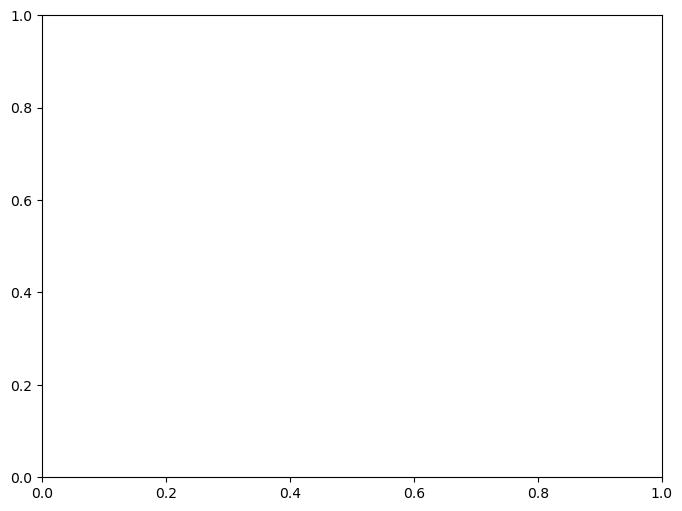

In [17]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr,annot=True,ax=ax)

In [ ]:
def unique_values():
    a = app.CODE_GENDER.unique()
    print("--------------CODE_GENDER--------------------------------------------")
    print(a)
    print()
    b = app.FLAG_OWN_CAR.unique()
    print("----------------------FLAG_OWN_CAR------------------------------------")
    print(b)
    print()
    c = app.FLAG_OWN_REALTY.unique()
    print('----------------------FLAG_OWN_REALTY--------------------------------------------')
    print(c)
    print()
    d = app.CNT_CHILDREN.unique()
    print('-------------------------CNT_CHILDREN-----------------------------------------')
    print(d)
    print()
    e = app.NAME_INCOME_TYPE.unique()
    print( '--------------------------NAME_INCOME_TYPE----------------------------------------')
    print(e)
    print()
    f = app.NAME_EDUCATION_TYPE.unique()
    print('--------------------------NAME_EDUCATION_TYPE----------------------------------------')
    print(f)
    print()
    g = app.NAME_FAMILY_STATUS.unique()
    print('--------------------------NAME_FAMILY_STATUS----------------------------------------')
    print(g)
    print()
    h = app.NAME_HOUSING_TYPE.unique()
    print('---------------------------NAME_HOUSING_TYPE---------------------------------------')
    print(h)
    print()
    i = app.OCCUPATION_TYPE.unique()
    print('------------------------OCCUPATION_TYPE------------------------------------------')
    print(i)
    print()
    j = app.CNT_FAM_MEMBERS.value_counts()
    print('----------------------------CNT_FAM_MEMBERS--------------------------------------')
    print(j)
    print()
    return unique_values

In [ ]:
unique_values()

In [ ]:
app.columns

In [ ]:
# dropping duplicate rows
app.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], keep = 'first', inplace = True)

In [ ]:
app.shape

In [18]:
app.info()

NameError: name 'app' is not defined

In [19]:
credit.head()

NameError: name 'credit' is not defined

In [23]:
credit.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [24]:
credit.shape

(1048575, 3)

In [25]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [26]:
# Data frame to analyze length of time since initial approval of credit card
# Shows number of past dues, paid off and no loan status.
grouped = credit.groupby('ID')

pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1 # Adding 1 since month starts at 0.

#Counting number of past dues, paid offs and no loans.
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
#Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index

In [27]:
pivot_tb.head(10)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715
5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,5,17,0,0,0,0,0,0,5001717
5001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39,3,24,2,0,0,0,0,10,5001718
5001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,41,2,0,0,0,0,0,0,5001719
5001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36,0,29,7,0,0,0,0,0,5001720


## Data Cleaning

In [28]:
def data_cleansing(data):
    # Adding number of family members with number of children to get overall family members.
    data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
    
    dropped_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL','OCCUPATION_TYPE','CNT_CHILDREN']
    data = data.drop(dropped_cols, axis = 1)
    
    #converting birth years and days employed to years.
    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH']/365) #Absolute
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']/365 
    
    #Cleaning up categorical values to lower the count of dummy variables.
    housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}
              
    income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}
    education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}
    family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}
    data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
    data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].map(family_status)
    return data

In [29]:
cleansed_app = data_cleansing(app)

In [30]:
cleansed_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0
2,5008806,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0
3,5008808,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0
7,5008812,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0
10,5008815,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,202500.0,Working,Higher education,Married,House / apartment,37.013699,-6.326027,2.0
438545,6839651,F,N,Y,99000.0,Pensioner,secondary,Single,House / apartment,51.594521,1000.665753,4.0
438547,6839917,F,N,Y,180000.0,Pensioner,Higher education,Married,House / apartment,30.043836,-7.408219,2.0
438552,6840104,M,N,Y,135000.0,Pensioner,secondary,Single,House / apartment,62.238356,1000.665753,1.0


In [31]:
def unique_values():
    a = cleansed_app.CODE_GENDER.unique()
    print("--------------CODE_GENDER--------------------------------------------")
    print(a)
    print()
    b = cleansed_app.FLAG_OWN_CAR.unique()
    print("----------------------FLAG_OWN_CAR------------------------------------")
    print(b)
    print()
    c = cleansed_app.FLAG_OWN_REALTY.unique()
    print('----------------------FLAG_OWN_REALTY--------------------------------------------')
    print(c)
    print()
   
    e = cleansed_app.NAME_INCOME_TYPE.unique()
    print( '--------------------------NAME_INCOME_TYPE----------------------------------------')
    print(e)
    print()
    f = cleansed_app.NAME_EDUCATION_TYPE.unique()
    print('--------------------------NAME_EDUCATION_TYPE----------------------------------------')
    print(f)
    print()
    g = cleansed_app.NAME_FAMILY_STATUS.unique()
    print('--------------------------NAME_FAMILY_STATUS----------------------------------------')
    print(g)
    print()
    h = cleansed_app.NAME_HOUSING_TYPE.unique()
    print('---------------------------NAME_HOUSING_TYPE---------------------------------------')
    print(h)
    print()
    
    j = cleansed_app.CNT_FAM_MEMBERS.value_counts()
    print('----------------------------CNT_FAM_MEMBERS--------------------------------------')
    print(j)
    print()
    
    return unique_values

In [32]:
unique_values()

--------------CODE_GENDER--------------------------------------------
['M' 'F']

----------------------FLAG_OWN_CAR------------------------------------
['Y' 'N']

----------------------FLAG_OWN_REALTY--------------------------------------------
['Y' 'N']

--------------------------NAME_INCOME_TYPE----------------------------------------
['Working' 'Pensioner' 'Student']

--------------------------NAME_EDUCATION_TYPE----------------------------------------
['Higher education' 'secondary' 'Academic degree']

--------------------------NAME_FAMILY_STATUS----------------------------------------
['Married' 'Single']

---------------------------NAME_HOUSING_TYPE---------------------------------------
['House / apartment' 'With parents']

----------------------------CNT_FAM_MEMBERS--------------------------------------
2.0     44488
1.0     18292
4.0     15007
6.0      7411
3.0      3002
8.0      1038
5.0       628
10.0      105
7.0        72
12.0       24
9.0         9
16.0        2
14.0     

<function __main__.unique_values()>

## Feature Engineering
**A ratio based method was used to create the target variable. For example, given a client with a time period of 60 months, if the client had paid off loan 40 times and was late 20 times, this would be considered a fairly good client given that there were more loans that were paid off on time compared to late payments. If a client had no loans throughout the initial approval of the credit card account, by default, this would be considered a good client as well. To identify a bad client, the number of past dues would exceed the number of loans paid off or if the client only has past dues. It may be better to incorporate a set difference between number of paid off loans and number of past dues. Meaning, there needs to be a significant gap between paid off loans and past dues. If a person has 50 past dues and 51 paid off loans, based on the ratio method, this would be considered good. However the difference is only 1 and this may not be a good sign of a good client. For simplicity sake, I will not adjust the algorithm further and keep it at ratio decisioning. Code is also not optimal, adjustment may be needed for the code to compute faster.**

In [33]:
def feature_engineering_target(data):
    good_or_bad = []
    for index, row in data.iterrows():
        paid_off = row['paid_off']
        over_1 = row['pastdue_1-29']
        over_30 = row['pastdue_30-59']
        over_60 = row['pastdue_60-89'] 
        over_90 = row['pastdue_90-119']
        over_120 = row['pastdue_120-149'] + row['pastdue_over_150']
        no_loan = row['no_loan']
            
        overall_pastdues = over_1+over_30+over_60+over_90+over_120    
            
        if overall_pastdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)
        
        elif overall_pastdues != 0:
            if paid_off > overall_pastdues:
                good_or_bad.append(1)
            elif paid_off <= overall_pastdues:
                good_or_bad.append(0)
        
        elif paid_off == 0 and no_loan != 0:
            if overall_pastdues <= no_loan or overall_pastdues >= no_loan:
                good_or_bad.append(0)

        else:
            good_or_bad.append(1)
                
        
    return good_or_bad

There is data on clients in the credit data that intersect with the application data. the following is a merge between the two data frames given on the data of clients that exist in both data sets. Featured engineered additional columns from the credit data.

In [34]:
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values
+ pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values
+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values

target['no_loan'] = pivot_tb['no_loan'].values
target['target'] = feature_engineering_target(pivot_tb)
credit_app = cleansed_app.merge(target, how = 'inner', on = 'ID')
credit_app.drop('ID', axis = 1, inplace = True)

In [35]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0,13,2,1,1
1,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0,7,7,16,0
2,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0,0,2,3,0
3,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0,0,14,3,0
4,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,F,N,N,180000.0,Pensioner,secondary,Married,House / apartment,56.438356,-0.542466,2.0,0,20,0,0
9705,F,N,Y,112500.0,Working,secondary,Married,House / apartment,43.389041,-7.380822,2.0,8,10,0,0
9706,M,Y,Y,90000.0,Working,secondary,Married,House / apartment,52.331507,-4.715068,2.0,0,16,5,0
9707,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,-3.630137,2.0,14,8,0,0


In [36]:
from sklearn.preprocessing import LabelEncoder

cg = LabelEncoder()
oc = LabelEncoder()
own_r = LabelEncoder()
it = LabelEncoder()
et = LabelEncoder()
fs = LabelEncoder()
ht = LabelEncoder()


credit_app['CODE_GENDER'] = cg.fit_transform(credit_app['CODE_GENDER'])
credit_app['FLAG_OWN_CAR'] = oc.fit_transform(credit_app['FLAG_OWN_CAR'])
credit_app['FLAG_OWN_REALTY'] = own_r.fit_transform(credit_app['FLAG_OWN_REALTY'])
credit_app['NAME_INCOME_TYPE'] = it.fit_transform(credit_app['NAME_INCOME_TYPE'])
credit_app['NAME_EDUCATION_TYPE'] = et.fit_transform(credit_app['NAME_EDUCATION_TYPE'])
credit_app['NAME_FAMILY_STATUS'] = fs.fit_transform(credit_app['NAME_FAMILY_STATUS'])
credit_app['NAME_HOUSING_TYPE'] = ht.fit_transform(credit_app['NAME_HOUSING_TYPE'])
    
    

In [37]:
print("CODE_GENDER",credit_app['CODE_GENDER'].unique())
print(cg.inverse_transform(list(credit_app['CODE_GENDER'].unique())))
print()
print("FLAG_OWN_CAR:",credit_app['FLAG_OWN_CAR'].unique())
print(oc.inverse_transform(list(credit_app['FLAG_OWN_CAR'].unique())))
print()
print("FLAG_OWN_REALTY", credit_app['FLAG_OWN_REALTY'].unique())
print(own_r.inverse_transform(list(credit_app['FLAG_OWN_REALTY'].unique())))
print()
print("NAME_INCOME_TYPE",credit_app['NAME_INCOME_TYPE'].unique())
print(it.inverse_transform(list(credit_app['NAME_INCOME_TYPE'].unique())))
print()
print("NAME_EDUCATION_TYPE",credit_app['NAME_EDUCATION_TYPE'].unique())
print(et.inverse_transform(list(credit_app['NAME_EDUCATION_TYPE'].unique())))
print()
print("NAME_FAMILY_STATUS",credit_app['NAME_FAMILY_STATUS'].unique())
print(fs.inverse_transform(list(credit_app['NAME_FAMILY_STATUS'].unique())))
print()
print("NAME_HOUSING_TYPE",credit_app['NAME_HOUSING_TYPE'].unique())
print(ht.inverse_transform(list(credit_app['NAME_HOUSING_TYPE'].unique())))

CODE_GENDER [1 0]
['M' 'F']

FLAG_OWN_CAR: [1 0]
['Y' 'N']

FLAG_OWN_REALTY [1 0]
['Y' 'N']

NAME_INCOME_TYPE [2 0 1]
['Working' 'Pensioner' 'Student']

NAME_EDUCATION_TYPE [1 2 0]
['Higher education' 'secondary' 'Academic degree']

NAME_FAMILY_STATUS [0 1]
['Married' 'Single']

NAME_HOUSING_TYPE [0 1]
['House / apartment' 'With parents']


In [38]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,1,1,1,427500.0,2,1,0,0,32.890411,-12.443836,2.0,13,2,1,1
1,1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,7,7,16,0
2,0,0,1,270000.0,2,2,1,0,52.356164,-8.358904,1.0,0,2,3,0
3,0,0,1,283500.0,0,1,1,0,61.545205,1000.665753,1.0,0,14,3,0
4,1,1,1,270000.0,2,1,0,0,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,180000.0,0,2,0,0,56.438356,-0.542466,2.0,0,20,0,0
9705,0,0,1,112500.0,2,2,0,0,43.389041,-7.380822,2.0,8,10,0,0
9706,1,1,1,90000.0,2,2,0,0,52.331507,-4.715068,2.0,0,16,5,0
9707,0,0,1,157500.0,0,1,0,0,33.936986,-3.630137,2.0,14,8,0,0


In [39]:
x = credit_app[credit_app.drop('target', axis = 1).columns]
y = credit_app['target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, random_state = 0)

In [40]:
xtest

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan
6152,0,0,1,270000.0,2,1,1,0,29.334247,-2.095890,1.0,0,6,0
3411,0,0,1,180000.0,2,2,1,0,29.424658,-3.556164,3.0,0,12,2
272,0,1,1,225000.0,2,1,0,0,38.761644,-4.358904,4.0,0,13,0
7051,0,0,1,202500.0,2,1,1,0,42.734247,-21.331507,1.0,0,12,46
3318,0,0,0,270000.0,2,1,0,0,40.967123,-22.216438,2.0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046,0,0,1,135000.0,0,2,1,0,66.408219,1000.665753,1.0,0,21,11
7624,0,1,1,450000.0,0,1,1,0,60.501370,1000.665753,1.0,0,6,1
5740,0,0,1,202500.0,2,2,0,0,48.117808,-4.693151,2.0,6,9,0
842,0,1,1,216000.0,2,1,0,0,41.846575,-3.898630,2.0,11,18,0


In [41]:
ytrain

8235    1
1755    0
509     0
5923    0
7722    0
       ..
7891    0
9225    0
4859    0
3264    0
2732    0
Name: target, Length: 7767, dtype: int64

In [42]:
print(ytrain.value_counts())
print(ytest.value_counts())

0    4258
1    3509
Name: target, dtype: int64
0    1037
1     905
Name: target, dtype: int64


Imported SMOTE in case of high imbalance of target variable. However, it does not seem to be highly imbalanced so it is fine not to use an imbalanced technique.

# Random Forest

It is working with the principal of BAGING, means it is taking samples from the dataset not taking all data at a time so it is able to handle imbalanced data

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 2)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
grid = RandomizedSearchCV(rf, grid_rf, cv = 5,verbose = True, n_jobs = -1)
grid.fit(xtrain,ytrain)
params = grid.best_params_
print(params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}


In [44]:
rf_grid = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 2,
                                 max_features = 'sqrt',
                                 max_depth = 80, bootstrap = True, random_state = 0)
rf.fit(xtrain, ytrain)
predictions_test = rf.predict(xtest)
roc_auc_test = roc_auc_score(ytest,predictions_test)
accuracy_test = accuracy_score(ytest,predictions_test)
f1_test = f1_score(ytest, predictions_test)

print('roc_auc test: ', roc_auc_test)
print('accuracy test: ', accuracy_test)
print('f1 test: ', f1_test)

roc_auc test:  0.9868309029979168
accuracy test:  0.9866117404737385
f1 test:  0.9856985698569856


In [45]:
#predictions_test = rf.predict(xtest)
#y_predict=rf.predict(xtest)

C:\Users\HP\AppData\Local\Temp/ipykernel_2728/3358049139.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C = C / C.astype(np.float).sum(axis=1)*100


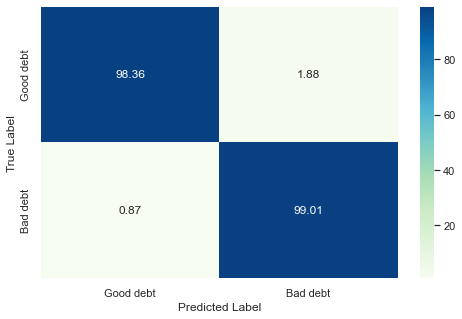

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Good debt', 'Bad debt']
C = confusion_matrix(ytest,predictions_test) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C,annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [47]:
predictions_test = rf.predict([[1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,7,7,16]])

In [48]:
predictions_test

array([0], dtype=int64)

In [49]:
import pickle
#pickle.dump(rf,open("c_card_aproval_pred.pickle","wb"))

In [50]:
test_model = rf.predict([[1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,7,7,16]])
test_model

array([0], dtype=int64)